<a href="https://colab.research.google.com/github/kridtapon/Velocity-Harmony/blob/main/Velocity_Harmony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.5/527.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Chande Momentum Oscillator (CMO)
def calculate_cmo(data, period):
    """
    Calculate the Chande Momentum Oscillator (CMO).
    """
    diff = data.diff()
    gain = diff.where(diff > 0, 0).rolling(window=period).sum()
    loss = -diff.where(diff < 0, 0).rolling(window=period).sum()
    cmo = 100 * (gain - loss) / (gain + loss)
    return cmo

# Function to calculate Ease of Movement (EMV)
def calculate_emv(data, period):
    """
    Calculate the Ease of Movement (EMV).
    """
    distance_moved = (data['High'] + data['Low']) / 2 - (data['High'].shift(1) + data['Low'].shift(1)) / 2
    box_ratio = data['Volume'] / (data['High'] - data['Low'])
    emv = distance_moved / box_ratio
    emv = emv.rolling(window=period).mean()
    return emv

# Define the stock symbol and time period
symbol = 'BTC-USD'  # Replace with your stock symbol
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Calculate indicators
cmo_period = 29
emv_period = 9
df['CMO'] = calculate_cmo(df['Close'], cmo_period)
df['EMV'] = calculate_emv(df, emv_period)

# Define Entry and Exit signals
df['Entry'] = (df['CMO'] > 0) & (df['EMV'] > 0)
df['Exit'] = (df['CMO'] < 0) & (df['EMV'] < 0)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                               2020-01-01 00:00:00
End                                 2024-12-31 00:00:00
Period                               1827 days 00:00:00
Start Value                                    100000.0
End Value                                4160583.669391
Total Return [%]                            4060.583669
Benchmark Return [%]                        1197.596406
Max Gross Exposure [%]                            100.0
Total Fees Paid                            70378.640381
Max Drawdown [%]                              38.592592
Max Drawdown Duration                 580 days 00:00:00
Total Trades                                         32
Total Closed Trades                                  32
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                     40.625
Best Trade [%]                               414.978916
Worst Trade [%]                              -13

[*********************100%***********************]  1 of 1 completed


Best Parameters: CMO Period = 29, EMV Period = 9
Best Performance: Total Return = 4060.58%
     CMO Period  EMV Period  Total Return
628          29           9     40.605837
630          29          11     40.177042
656          30          11     39.845142
629          29          10     38.356328
601          28           8     37.320217


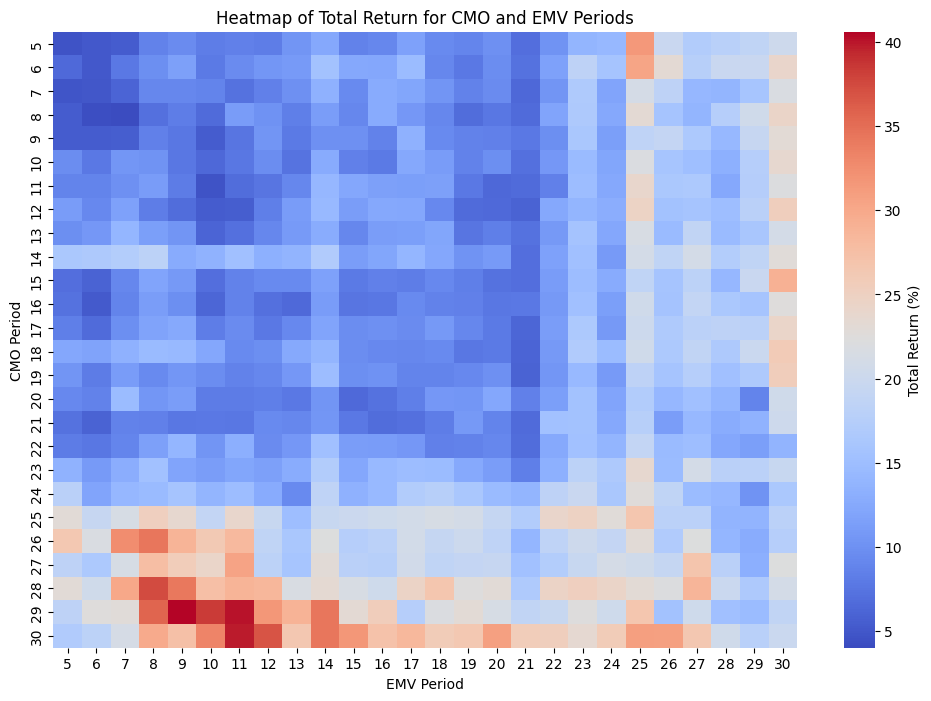

,0
Start,2020-01-01 00:00:00
End,2024-12-31 00:00:00
Period,1827 days 00:00:00
Start Value,100000.0
End Value,4160583.669391
Total Return [%],4060.583669
Benchmark Return [%],1197.596406
Max Gross Exposure [%],100.0
Total Fees Paid,70378.640381
Max Drawdown [%],38.592592


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

# Function to calculate Chande Momentum Oscillator (CMO)
def calculate_cmo(data, period):
    diff = data.diff()
    gain = diff.where(diff > 0, 0).rolling(window=period).sum()
    loss = -diff.where(diff < 0, 0).rolling(window=period).sum()
    cmo = 100 * (gain - loss) / (gain + loss)
    return cmo

# Function to calculate Ease of Movement (EMV)
def calculate_emv(data, period):
    distance_moved = (data['High'] + data['Low']) / 2 - (data['High'].shift(1) + data['Low'].shift(1)) / 2
    box_ratio = data['Volume'] / (data['High'] - data['Low'])
    emv = distance_moved / box_ratio
    emv = emv.rolling(window=period).mean()
    return emv

# Define the stock symbol and time period
symbol = 'BTC-USD'  # Replace with your stock symbol
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Define parameter ranges for optimization
cmo_period_range = range(5, 31)  # Range of CMO periods
emv_period_range = range(5, 31)   # Range of EMV periods

# Grid search for the best combination of parameters
best_params = None
best_performance = -np.inf
results = []

for cmo_period, emv_period in product(cmo_period_range, emv_period_range):
    # Calculate indicators
    df['CMO'] = calculate_cmo(df['Close'], cmo_period)
    df['EMV'] = calculate_emv(df, emv_period)

    # Define Entry and Exit signals
    df['Entry'] = (df['CMO'] > 0) & (df['EMV'] > 0)
    df['Exit'] = (df['CMO'] < 0) & (df['EMV'] < 0)

    # Filter data for the test period (2020-2025)
    test_data = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=test_data['Close'],
        entries=test_data['Entry'],
        exits=test_data['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Evaluate performance (e.g., based on total return)
    total_return = portfolio.total_return()

    results.append((cmo_period, emv_period, total_return))

    # Update the best parameters if the current combination performs better
    if total_return > best_performance:
        best_performance = total_return
        best_params = (cmo_period, emv_period)

# Print the best parameters and performance
print(f"Best Parameters: CMO Period = {best_params[0]}, EMV Period = {best_params[1]}")
print(f"Best Performance: Total Return = {best_performance:.2%}")

# Display results for all tested parameter combinations
results_df = pd.DataFrame(results, columns=['CMO Period', 'EMV Period', 'Total Return'])
print(results_df.sort_values(by='Total Return', ascending=False).head())

# Create a pivot table for the heatmap
heatmap_data = results_df.pivot(index='CMO Period', columns='EMV Period', values='Total Return')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, cbar_kws={'label': 'Total Return (%)'})
plt.title('Heatmap of Total Return for CMO and EMV Periods')
plt.xlabel('EMV Period')
plt.ylabel('CMO Period')
plt.show()

# Plot equity curve for the best parameters
df['CMO'] = calculate_cmo(df['Close'], best_params[0])
df['EMV'] = calculate_emv(df, best_params[1])
df['Entry'] = (df['CMO'] > 0) & (df['EMV'] > 0)
df['Exit'] = (df['CMO'] < 0) & (df['EMV'] < 0)

test_data = df[(df.index.year >= 2020) & (df.index.year <= 2025)]
portfolio = vbt.Portfolio.from_signals(
    close=test_data['Close'],
    entries=test_data['Entry'],
    exits=test_data['Exit'],
    init_cash=100_000,
    fees=0.001
)
portfolio.plot().show()

# Display performance metrics
portfolio.stats()
